In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Data Preparation and Visualization

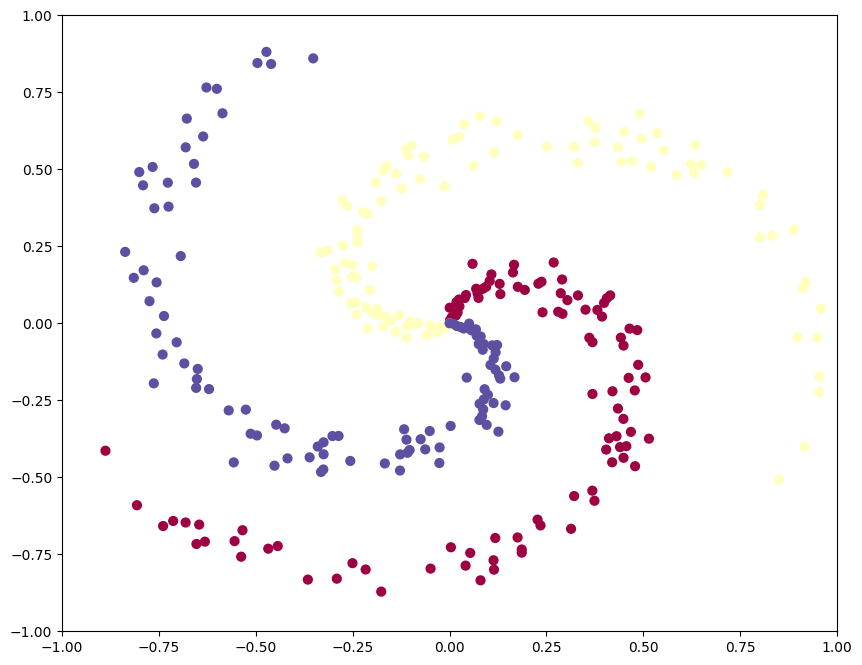

In [ ]:
np.random.seed(0)
# Creating 3 classes with 100 points each, each point is (x, y)
num_data_samples = 100 # number of points per class
dimensions = 2 # dimensionality
num_classes = 3 # number of classes
X = np.zeros((num_data_samples * num_classes, dimensions))  # Data matrix (300 x 2)
y = np.zeros(num_data_samples * num_classes, dtype='uint8')  # Class labels (300)
for j in range(num_classes):
  ix = range(num_data_samples * j, num_data_samples * (j + 1))
  r = np.linspace(0.0, 1, num_data_samples) # radius
  t = np.linspace(j * 4, (j + 1) * 4, num_data_samples) + np.random.randn(num_data_samples) * 0.2 # theta
  X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()

## Train a Softmax Classifier

In [ ]:
# initialize parameters randomly
W = 0.01 * np.random.randn(dimensions, num_classes)
b = np.zeros((1, num_classes))

# hyperparameters
step_size = 1e-0
reg = 1e-3  # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  # Forward Pass
  # evaluate class scores, [num_data_samples x num_classes]
  scores = np.dot(X, W) + b

  # compute the class probabilites
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # [num_data_samples x num_classes]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples), y])
  data_loss = np.sum(correct_logprobs) / num_examples
  reg_loss = 0.5 * reg * np.sum(W * W)  # L2 regularization
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print("iteration %d: loss %f" % (i, loss))

  # Backward Pass
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples), y] -= 1 # gradient of the loss w.r.t the scores
  dscores /= num_examples # average gradient across all training examples

  # backpropate the gradient to the parameters (W, b)
  dW = np.dot(X.T, dscores) # gradient of loss w.r.t W
  db = np.sum(dscores, axis=0, keepdims=True) # gradient of loss w.r.t b

  dW += reg * W  # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.096919
iteration 10: loss 0.917310
iteration 20: loss 0.851535
iteration 30: loss 0.822352
iteration 40: loss 0.807594
iteration 50: loss 0.799452
iteration 60: loss 0.794683
iteration 70: loss 0.791765
iteration 80: loss 0.789921
iteration 90: loss 0.788726
iteration 100: loss 0.787937
iteration 110: loss 0.787408
iteration 120: loss 0.787049
iteration 130: loss 0.786803
iteration 140: loss 0.786633
iteration 150: loss 0.786514
iteration 160: loss 0.786431
iteration 170: loss 0.786373
iteration 180: loss 0.786331
iteration 190: loss 0.786302


## Evaluation Accuracy

In [ ]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.49


## Visualization of Decision Boundary

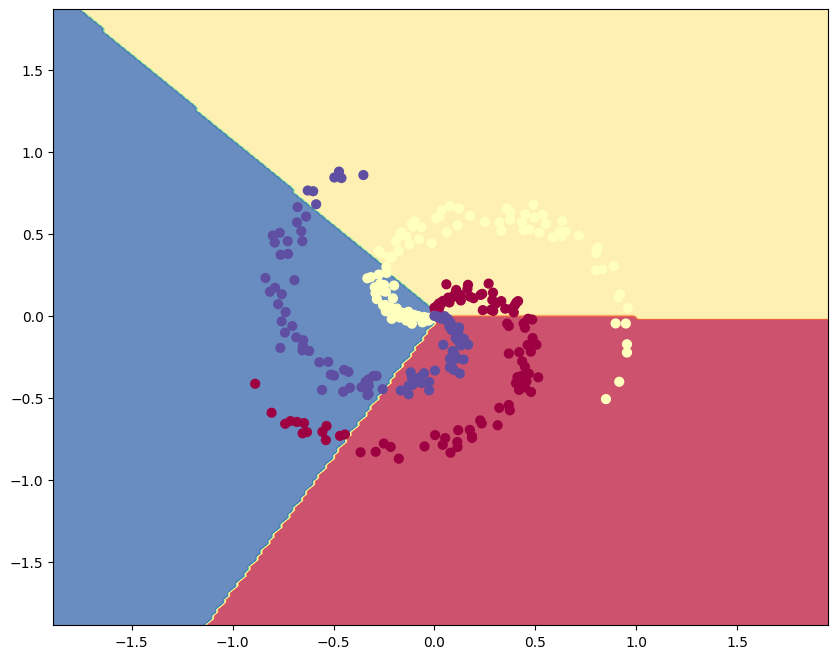

In [ ]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## Example using Neural Network

In [ ]:
# Adding one hidden layer on prior example
# initialize parameters randomly
h = 100  # size of hidden layer
W = 0.01 * np.random.randn(dimensions, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, num_classes)
b2 = np.zeros((1, num_classes))

# hyperparameters
step_size = 1e-0
reg = 1e-3  # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
  # evaluate class scores, [num_data_samples x num_classes]
  hidden_layer = np.maximum(0, np.dot(X, W) + b)  # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2

  # compute the class probabilites
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # [num_data_samples x num_classes]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples), y])
  data_loss = np.sum(correct_logprobs) / num_examples
  reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2 * W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print("iteration %d: loss %f" % (i, loss))

  # Backward Pass
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples), y] -= 1 # gradient of the loss w.r.t the scores
  dscores /= num_examples # average gradient across all training examples

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098637
iteration 1000: loss 0.294416
iteration 2000: loss 0.266441
iteration 3000: loss 0.251507
iteration 4000: loss 0.248297
iteration 5000: loss 0.247106
iteration 6000: loss 0.246431
iteration 7000: loss 0.245955
iteration 8000: loss 0.245484
iteration 9000: loss 0.245214


## Evaluation Accuracy

In [ ]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.98


## Building 2-layer NN using Pytorch
Four type of methods
- using tensor representation
 - manual fw, manual bw
- using auto gradient
 - manual fw, automatic bw
- using nn module
 - automatic fw, automatic bw
- customize the model
 - define your own layer


### Using Tensor Representation

In [ ]:
# Treat as tensors, similar to NumPy, Can use GPU
import torch

device = torch.device('cpu')
# device = torch.device('cuda)  # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
X = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device)
w2 = torch.randn(H, D_out, device=device)

learning_rate = 1e-6
for t in range(500):
  # Forward pass: compute predicted y
  h = X.mm(w1)  # mm: matrix multiplication for batch processing
  h_relu = h.clamp(min=0)  # ReLU
  y_pred = h_relu.mm(w2)  # Output scores

  # Compute and print loss; loss is a scaler and is stored ina PyTorch Tensor
  # of shape (); we can get its value as a Python number with loss.item().
  loss = (y_pred - y).pow(2).sum()  # MSE
  print(t, loss.item())

  # Backprop to compute gradients of w1 and w2 with respect to loss
  grad_y_pred = 2.0 * (y_pred - y)  # Gradient of MSE Loss
  grad_w2 = h_relu.t().mm(grad_y_pred)  # dL/dW2
  grad_h_relu = grad_y_pred.mm(w2.t())  # dL/dh
  grad_h = grad_h_relu.clone()
  grad_h[h < 0] = 0  # Backpropagate ReLU
  grad_w1 = X.t().mm(grad_h)  # dL/dW1

  # Update weights using gradient descent
  w1 -= learning_rate * grad_w1
  w2 -= learning_rate * grad_w2

### Using Autograd

In [ ]:
# Pytorch can automatically compute gradients, must be differentiable

# Create random Tensors for weights; setting requires_grad=True means that we
# want to compute gradients for these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, requires_grad=True)

y_pred = x.mm(w1).clamp(min=0).mm(w2)  # Simplified writing (h = XW1, ReLU, output scores)

# Compute and print loss. Loss is a Tensor of shape (), and loss.item()
# is a Python number giving its value.
loss = (y_pred - y).pow(2).sum()  # MSE loss
print(t, loss.item())

# Use autograd to compute the backward pass. This call will compute the
# gradient of loss with respect to all Tensors with requires_grad=True.
# After this call w1.grad and w2.grad will be Tensors holding the gradient
# of the loss with respect to w1 and w2 respectively.
loss.backward()  # Automatic gradient calculation

# Update weights using gradient descent. For this step we just want to mutate
# the values of w1 and w2 in-place; we don't want to build up a computational
# graph for the update steps, so we use the torch.no_grad() context manager
# to prevent PyTorch from building a computational graph for the updates
with torch.no_grad():
  w1 -= learning_rate * w1.grad
  w2 -= learning_rate * w2.grad

# manually zero the gradients after running the backward pass
  w1.grad.zero_()
  w2.grad.zero_()

### Using nn Module

In [ ]:
import torch.nn as nn
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in a sequence to
# procude its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# After constructing the model we use the .to() method to move it to the
# desired device
model = torch.nn.Sequential(
  torch.nn.Linear(D_in, H),  # First Layer (Input -> Hidden)
  torch.nn.ReLU(),  # ReLU
  torch.nn.Linear(H, D_out),  # Second Layer (Hidden -> Output)
).to(device)

# the nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function. Setting
# reduction='sum' means that we are computing the *sum* of squared errors rather
# than the mean; this is for consistency with the examples above where we
# manually compute the loss, but in practice it is more common to use mean
# squared error as a loss by setting reduction='elementwise_mean'.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(500):
  # Forward pass: compute predicted y by passing x to the model. Module objects
  # override the __call__ operator so you can call them like functions. When
  # doing so you pass a Tensor of input data to the Module and it produces
  # a Tensor of output data.
  y_pred = model(x)

  # Compute and print loss. We pass Tensors containing the predicted and true
  # values of y, and the loss function returns a Tensor containing the loss.
  loss = loss_fn(y_pred, y)

  # Zero the gradients before running the backward pass.
  model.zero_grad()

  # Backward pass: compute gradient of the loss with respect to all the learnable
  # parameters of the model. Internally, the parameters of each Module are stored
  # in Tensors with requires_grad=True, so this call will compute gradients for
  # all learnable parameters in the model.
  loss.backward()

  # Update the weights using gradient descent. Each parameter is a Tensor, so
  # we can access its data and gradients like we did before.
  with torch.no_grad():
    for param in model.parameters():
      param -= learning_rate * param.grad

### Customize Your Own Model

In [ ]:
class TwoLayerNet(torch.nn.Module):
  def __init__(self, D_in, H, D_out):
    """
    In the constructor we instantiate two nn.Linear modules and assign them as
    member variables.
    """
    super(TwoLayerNet, self).__init__()
    self.linear1 = torch.nn.Linear(D_in, H)
    self.linear2 = torch.nn.Linear(H, D_out)

  def forward(self, x):
    """
    In the forward function we accept a Tensor of input data and we must return
    a Tensor of output data. We can use Modules defined in the constructor as
    well as arbitrary (differentiable) operators on Tensors.
    """
    h_relu = self.linear1(x).clamp(min=0)
    y_pred = self.linear2(h_relu)
    return y_pred

# Construct our model by instantiating the class defined above.
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(500):
  # Forward pass: Compute predicted y by passing x to the model
  y_pred = model(x)

  # Compute and print loss
  loss = loss_fn(y_pred, y)
  print(t, loss.item())

  # Zero gradients, perform a backward pass, and update the weights.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()